# DataJoint Workflow for Calcium Imaging

+ This notebook demonstrates using the open-source DataJoint Element to build a workflow for
calcium imaging.
+ For a detailed tutorial, please see the [tutorial notebook](./tutorial.ipynb).

<img src =../images/rawscans.gif title="value" width="200" height="200"/>
<img src =../images/motioncorrectedscans.gif width="200" height="200"/>
<img src =../images/cellsegmentation.png width="200" height="200"/>
<img src =../images/calciumtraces.png width="200" height="200"/> 

Left to right: Raw scans, Motion corrected scans, Cell segmentations, Calcium events

### Import dependencies

In [1]:
import datajoint as dj
from workflow_calcium_imaging.pipeline import subject, session, scan, imaging
from element_calcium_imaging.plotting.widget import main

[2023-03-13 16:22:38,356][WARNING]: lab.Project and related tables will be removed in a future version of Element Lab. Please use the project schema.
[2023-03-13 16:22:38,359][INFO]: Connecting root@fakeservices.datajoint.io:3306
[2023-03-13 16:22:38,371][INFO]: Connected root@fakeservices.datajoint.io:3306


### View workflow

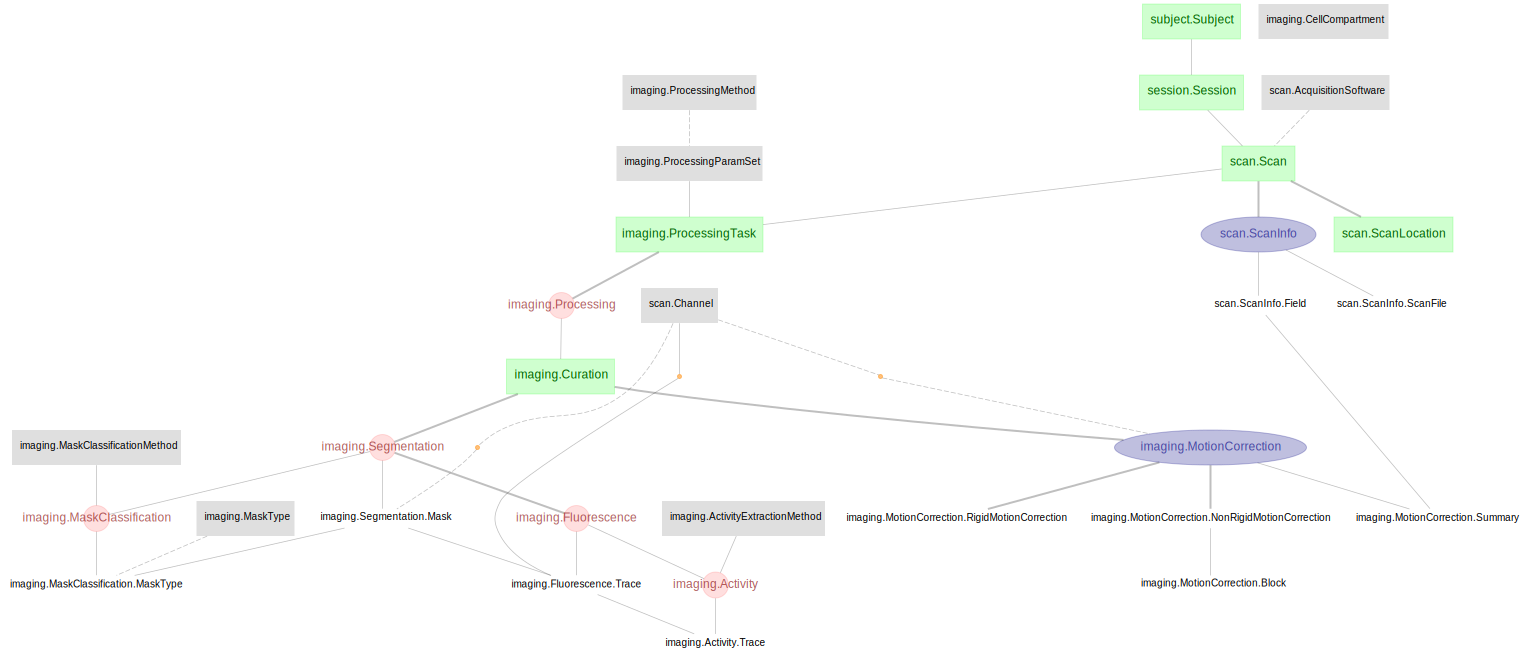

In [2]:
dj.Diagram(subject.Subject) + dj.Diagram(session.Session) + dj.Diagram(scan) + dj.Diagram(imaging)

### Insert an entry in a manual table by calling the `insert()` method

```python
subject.Subject.insert1(
     dict(subject='subject1',
          subject_birth_date='2023-01-01',
          sex='U'
     )
)
```

### Automatically process data with the `populate()` method

+ Once data is inserted into manual tables, the `populate()` function automatically runs the ingestion and processing routines. 

+ For example, to run Suite2p processing in the `Processing` table:

     ```python
     imaging.Processing.populate()
     ```

### Visualize processed data

In [3]:
main(imaging)

For an in-depth tutorial please see the [tutorial notebook](./tutorial.ipynb).